#  🏥**Final Project: Medical Cost Regression Analysis** 

## 🧑‍💻 Author: Justin Schroder

## 📅 Date: April 13, 2025

## 📝 Intorduction:

This project focuses on predicting medical costs using a dataset that includes features such as age, sex, BMI, smoking status, and region. The goal was to build a regression model that can estimate medical charges based on these factors. Various techniques, including feature scaling and polynomial features, were explored to improve the model's accuracy. Performance was evaluated using key metrics like R², MAE, and RMSE, with the best results achieved through a pipeline incorporating polynomial features.

---

### Section 1: Import and Inspect the Data
In the code cell below, import the necessary Python libraries for this notebook.

#### 1.1 Imports

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#### 1.2 Load the dataset

In [237]:
# Load the dataset
df = pd.read_csv(r'C:\Projects\applied-ml-projects\ml-06-medical-cost\data folder\insurance.csv')

# Display the first 10 rows
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### 1.2 Check for missing values and display summary statistics

In [238]:
# Check for missing values
missing_values = df.isnull().sum()

# Display summary statistics
summary_stats = df.describe()

# Output the results
print("Missing Values:\n", missing_values)
print("\nSummary Statistics:\n", summary_stats)

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary Statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### 🔍 Section 1 Reflection:
The dataset is complete with no missing values and includes both numerical and categorical features. Charges show a wide range, with some extreme outliers, suggesting a right-skewed distribution. The smoker category is imbalanced, with more non-smokers. While there are no major data issues, handling outliers and skewed data may improve analysis.


---

### Section 2: Data Exploration and Preparation
#### 2.1 Explore Data Patterns and Distributions

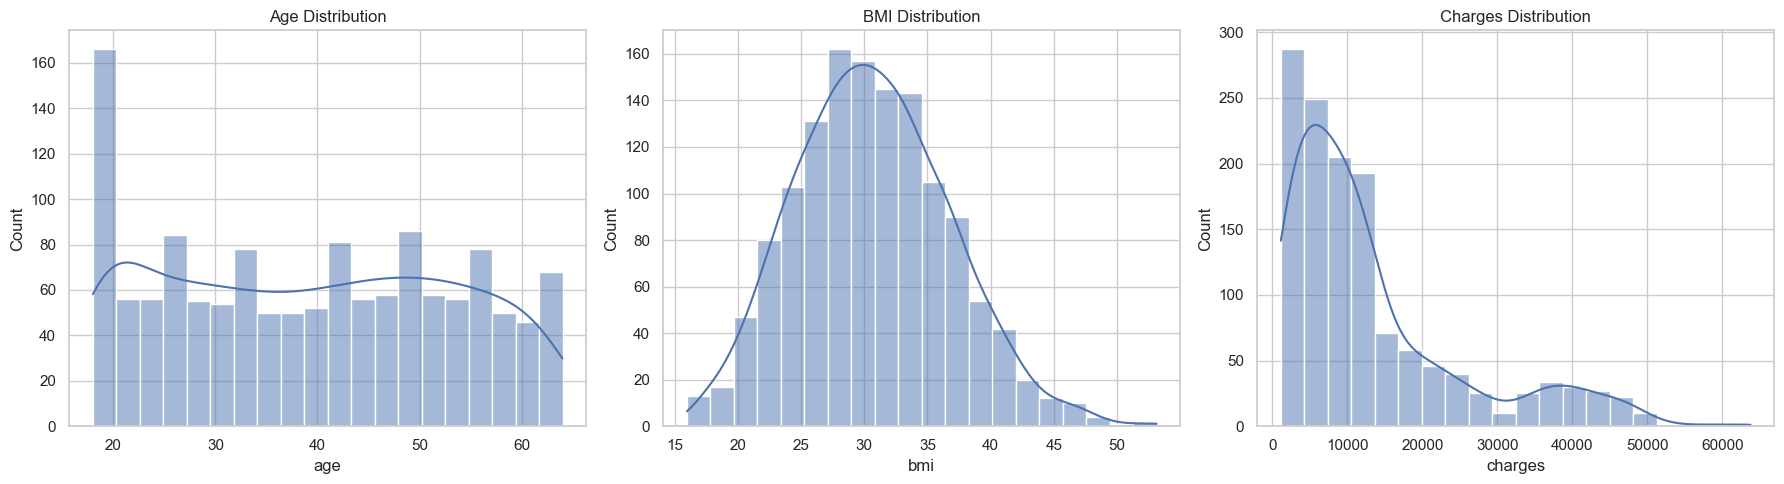

In [239]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create histograms for the numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age histogram
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# BMI histogram
sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')

# Charges histogram
sns.histplot(df['charges'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Charges Distribution')

# Display the plots
plt.tight_layout()
plt.show()

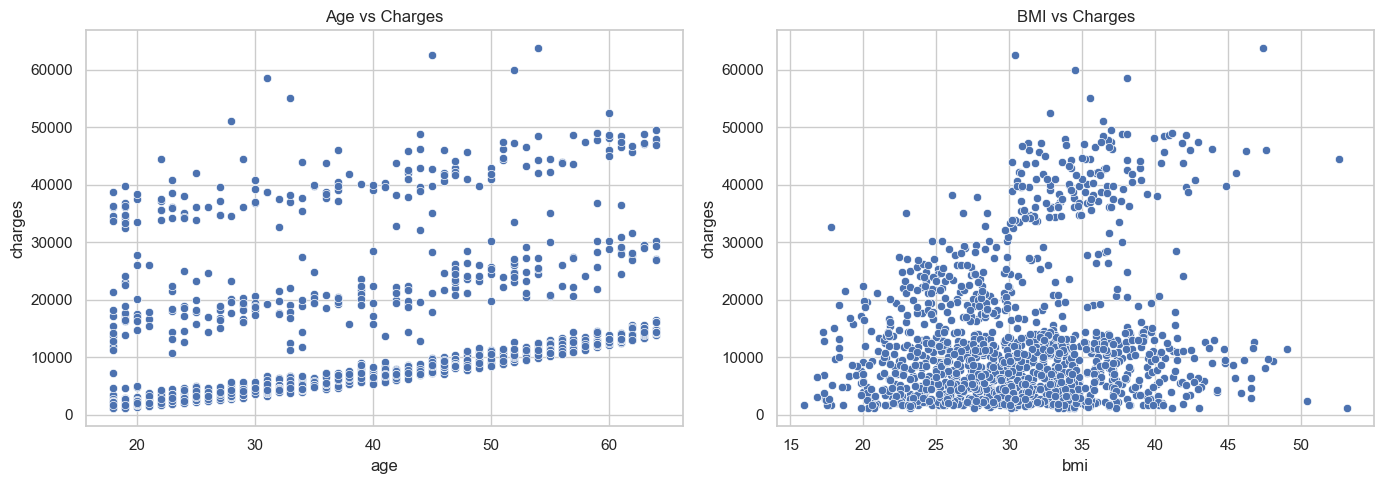

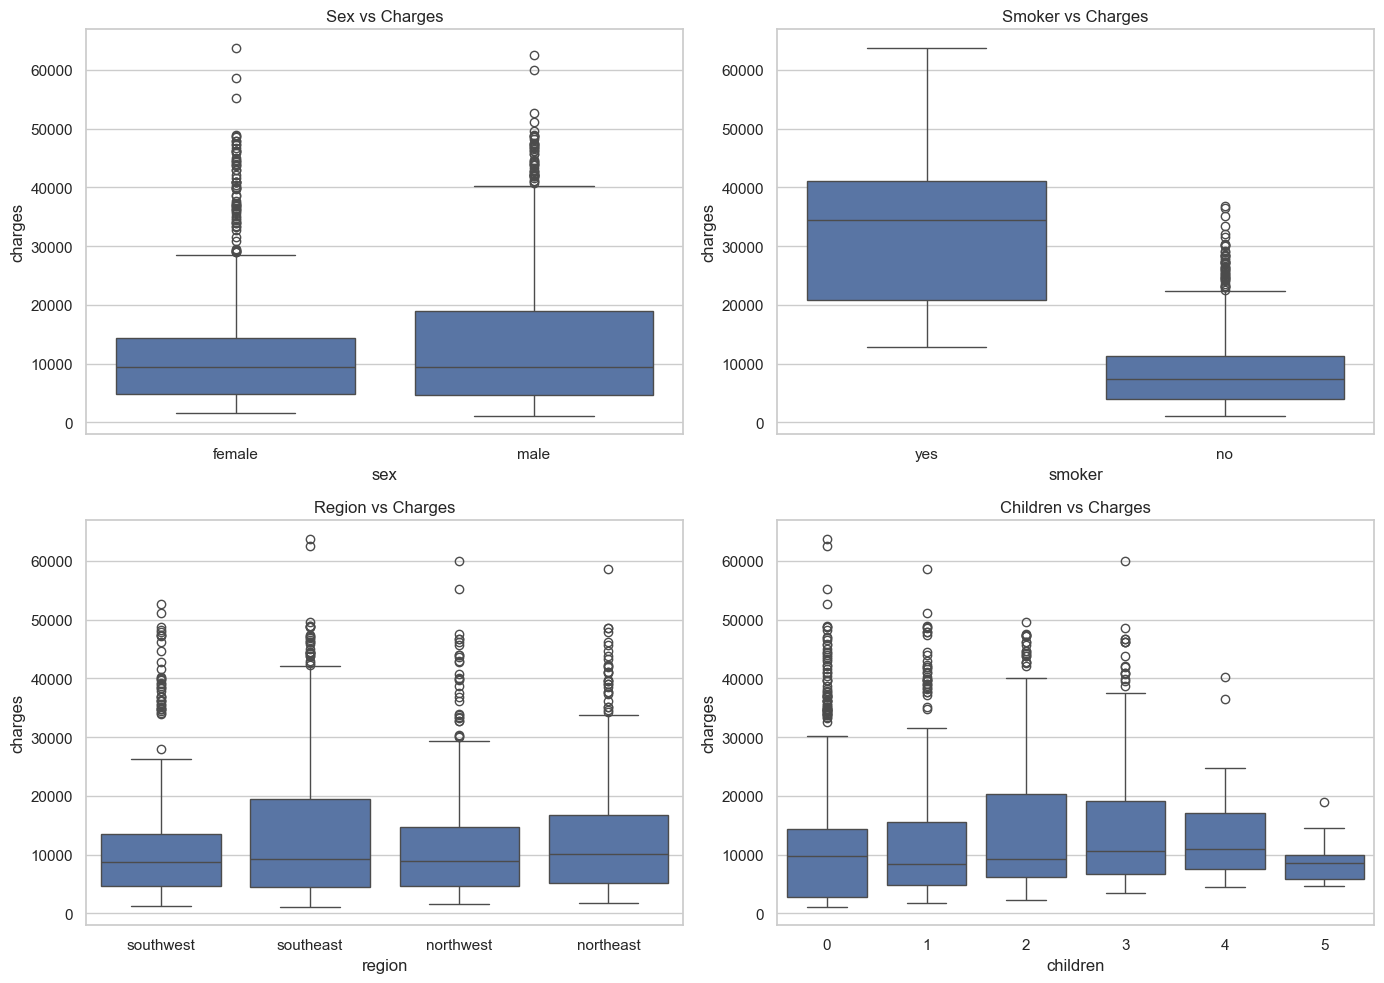

In [240]:
# Scatter plots for numerical features vs. charges
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(data=df, x='age', y='charges', ax=axes[0])
axes[0].set_title('Age vs Charges')

sns.scatterplot(data=df, x='bmi', y='charges', ax=axes[1])
axes[1].set_title('BMI vs Charges')

plt.tight_layout()
plt.show()

# Box plots for categorical features vs. charges
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(data=df, x='sex', y='charges', ax=axes[0,0])
axes[0,0].set_title('Sex vs Charges')

sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0,1])
axes[0,1].set_title('Smoker vs Charges')

sns.boxplot(data=df, x='region', y='charges', ax=axes[1,0])
axes[1,0].set_title('Region vs Charges')

sns.boxplot(data=df, x='children', y='charges', ax=axes[1,1])
axes[1,1].set_title('Children vs Charges')

plt.tight_layout()
plt.show()

#### 2.2 Clean Data
Convert sex and smoker to numerical values.

In [241]:
# Encode categorical fields (sex & smoker to 1 and 0)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

### 🔍 Section 2 Reflection:
Most medical charges are on the lower end, but there are a few very high outliers. Smokers clearly stand out with much higher charges compared to non-smokers. BMI and age show moderate trends with charges, though the relationships aren’t perfectly linear. In contrast, gender, region, and number of children show little impact on cost. Overall, a few key variables like smoking status and BMI seem to be stronger indicators of higher medical expenses. The dataset was already clean, with no missing values, so no data cleaning was required. I did perform basic feature engineering by converting categorical variables such as gender and smoking status into binary numeric values to prepare the data for modeling.


---

### Section 3: Feature Selection and Justification

#### 3.1  Choose Features and Target

* Target (Y): charges

* Selected Features (x):
  * age – older age may lead to higher medical costs
  * bmi – higher BMI may relate to health risks
  * sex – may have a small effect based on historical data (maybe due to pregancy or other scenarios)
  * smoker – has a strong effect on medical costs based on previous plots

These features were selected because they are numeric or encoded and likely to influence insurance charges.

#### 3.2 Define X and Y

In [242]:
# Define input features and target
X = df[['age', 'bmi', 'sex', 'smoker']]
y = df['charges']

### 🔍 Section 3 Reflection

I chose age, BMI, sex, and smoker status because they directly relate to health and medical risk. Smoker status has a strong impact on charges, while age and BMI are common health indicators. Including these features should help improve prediction accuracy since they are likely tied to medical costs.

---

### Section 4: Train a Model (Linear Regression)

#### 4.1 Split the Data into Training and Test Sets

In [243]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 1070
Test set size: 268


#### 4.2 Train the Model

In [244]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

#### 4.3 Evalulate Performance

In [245]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R^2 (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the evaluation metrics
print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R²: 0.7776757765738431
Mean Absolute Error (MAE): 4260.991696434018
Root Mean Squared Error (RMSE): 5874.993929086607


### 🔍 Section 4 Reflection: 

The model performed fairly well with an R² of 0.78, explaining 78% of the variance in medical charges. However, the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were still high, showing there’s room to improve accuracy. This suggests that adding more features or using a more complex model could help reduce errors.

---

### Section 5: Improve the Model or Try Alternates

#### 5.1 Implement Pipeline 1 (Imputer → StandardScaler → Linear Regression)

In [246]:
# Pipeline 1: Imputer -> StandardScaler -> Linear Regression
pipeline_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Impute missing values
    ('scaler', StandardScaler()),                  # Scale features
    ('regressor', LinearRegression())              # Linear Regression model
])

# Fit the pipeline to the training data
pipeline_1.fit(X_train, y_train)

# Make predictions
y_pred_1 = pipeline_1.predict(X_test)

# Evaluate performance
r2_1 = r2_score(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))

print(f"Pipeline 1 - R²: {r2_1}")
print(f"Pipeline 1 - MAE: {mae_1}")
print(f"Pipeline 1 - RMSE: {rmse_1}")


Pipeline 1 - R²: 0.7776757765738431
Pipeline 1 - MAE: 4260.991696434017
Pipeline 1 - RMSE: 5874.993929086607


#### 5.2 Implement Pipeline 2 (Imputer → Polynomial Features → StandardScaler → Linear Regression)

In [247]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2: Imputer -> PolynomialFeatures (degree=3) -> StandardScaler -> Linear Regression
pipeline_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),        # Impute missing values
    ('poly', PolynomialFeatures(degree=3)),              # Generate polynomial features
    ('scaler', StandardScaler()),                        # Scale features
    ('regressor', LinearRegression())                    # Linear Regression model
])

# Fit the pipeline to the training data
pipeline_2.fit(X_train, y_train)

# Make predictions
y_pred_2 = pipeline_2.predict(X_test)

# Evaluate performance
r2_2 = r2_score(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))

print(f"Pipeline 2 - R²: {r2_2}")
print(f"Pipeline 2 - MAE: {mae_2}")
print(f"Pipeline 2 - RMSE: {rmse_2}")

Pipeline 2 - R²: 0.8580516271667846
Pipeline 2 - MAE: 2922.621648403316
Pipeline 2 - RMSE: 4694.390782591285


#### 5.3 Compare Performance

In [248]:
# Comparison of performance metrics
print("Comparison of Model Performance:")
print(f"Pipeline 1 - R²: {r2_1}, MAE: {mae_1}, RMSE: {rmse_1}")
print(f"Pipeline 2 - R²: {r2_2}, MAE: {mae_2}, RMSE: {rmse_2}")

Comparison of Model Performance:
Pipeline 1 - R²: 0.7776757765738431, MAE: 4260.991696434017, RMSE: 5874.993929086607
Pipeline 2 - R²: 0.8580516271667846, MAE: 2922.621648403316, RMSE: 4694.390782591285


### 🔍 Section 5 Reflection: 

Pipeline 2, with polynomial features, performed better than Pipeline 1. It had a higher R² and lower MAE and RMSE, meaning it made more accurate predictions. Scaling helped both models by normalizing the features, but the added polynomial features in Pipeline 2 improved the model's performance.

--- 

### Section 6: Final Thoughts & Insights

#### 6.1 Summary of Findings:
Pipeline 2 with polynomial features performed the best, giving higher accuracy and better predictions. Scaling improved model performance, and adding polynomial features helped capture more complex patterns.

#### 6.2 Challenges Faced:
Deciding on the right features to use and tuning the model was tricky, especially since I wished there were more features to choose from to improve the model’s performance.

#### 6.3 Future Steps:
If I had more time, I would focus on handling anomalies more effectively or explore a different dataset with more features to improve the model’s accuracy.

### 🔍 Reflection 6: What Did You Learn from This Project?

I learned that feature selection and scaling are key to making better predictions. Trying different models showed that adding polynomial features can improve performance. Scaling is also important to avoid problems with features having different ranges. Evaluating and tweaking models helped me better understand regression analysis.

---